In [539]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ex 1

In [540]:
def pmd(sequence):
    alphabet, freq= np.unique(sequence, return_counts=True)
    freq=freq/len(sequence)
    d={'alphabet': alphabet, 'freq': freq, 'Empirical information [bits]': -np.log2(freq)}
    return(pd.DataFrame(d))

def ShannonEntropy(df):
    H=np.dot(df["Empirical information [bits]"].values,df["freq"].values)
    return H

def CollisionEntropy(df):
    H2=-np.log2(sum((df["freq"].values)**2))
    return H2

def GuessingEntropy(df):
    return df["Empirical information [bits]"].min()


# Ex 2

## 2.1 Uniform Distribution

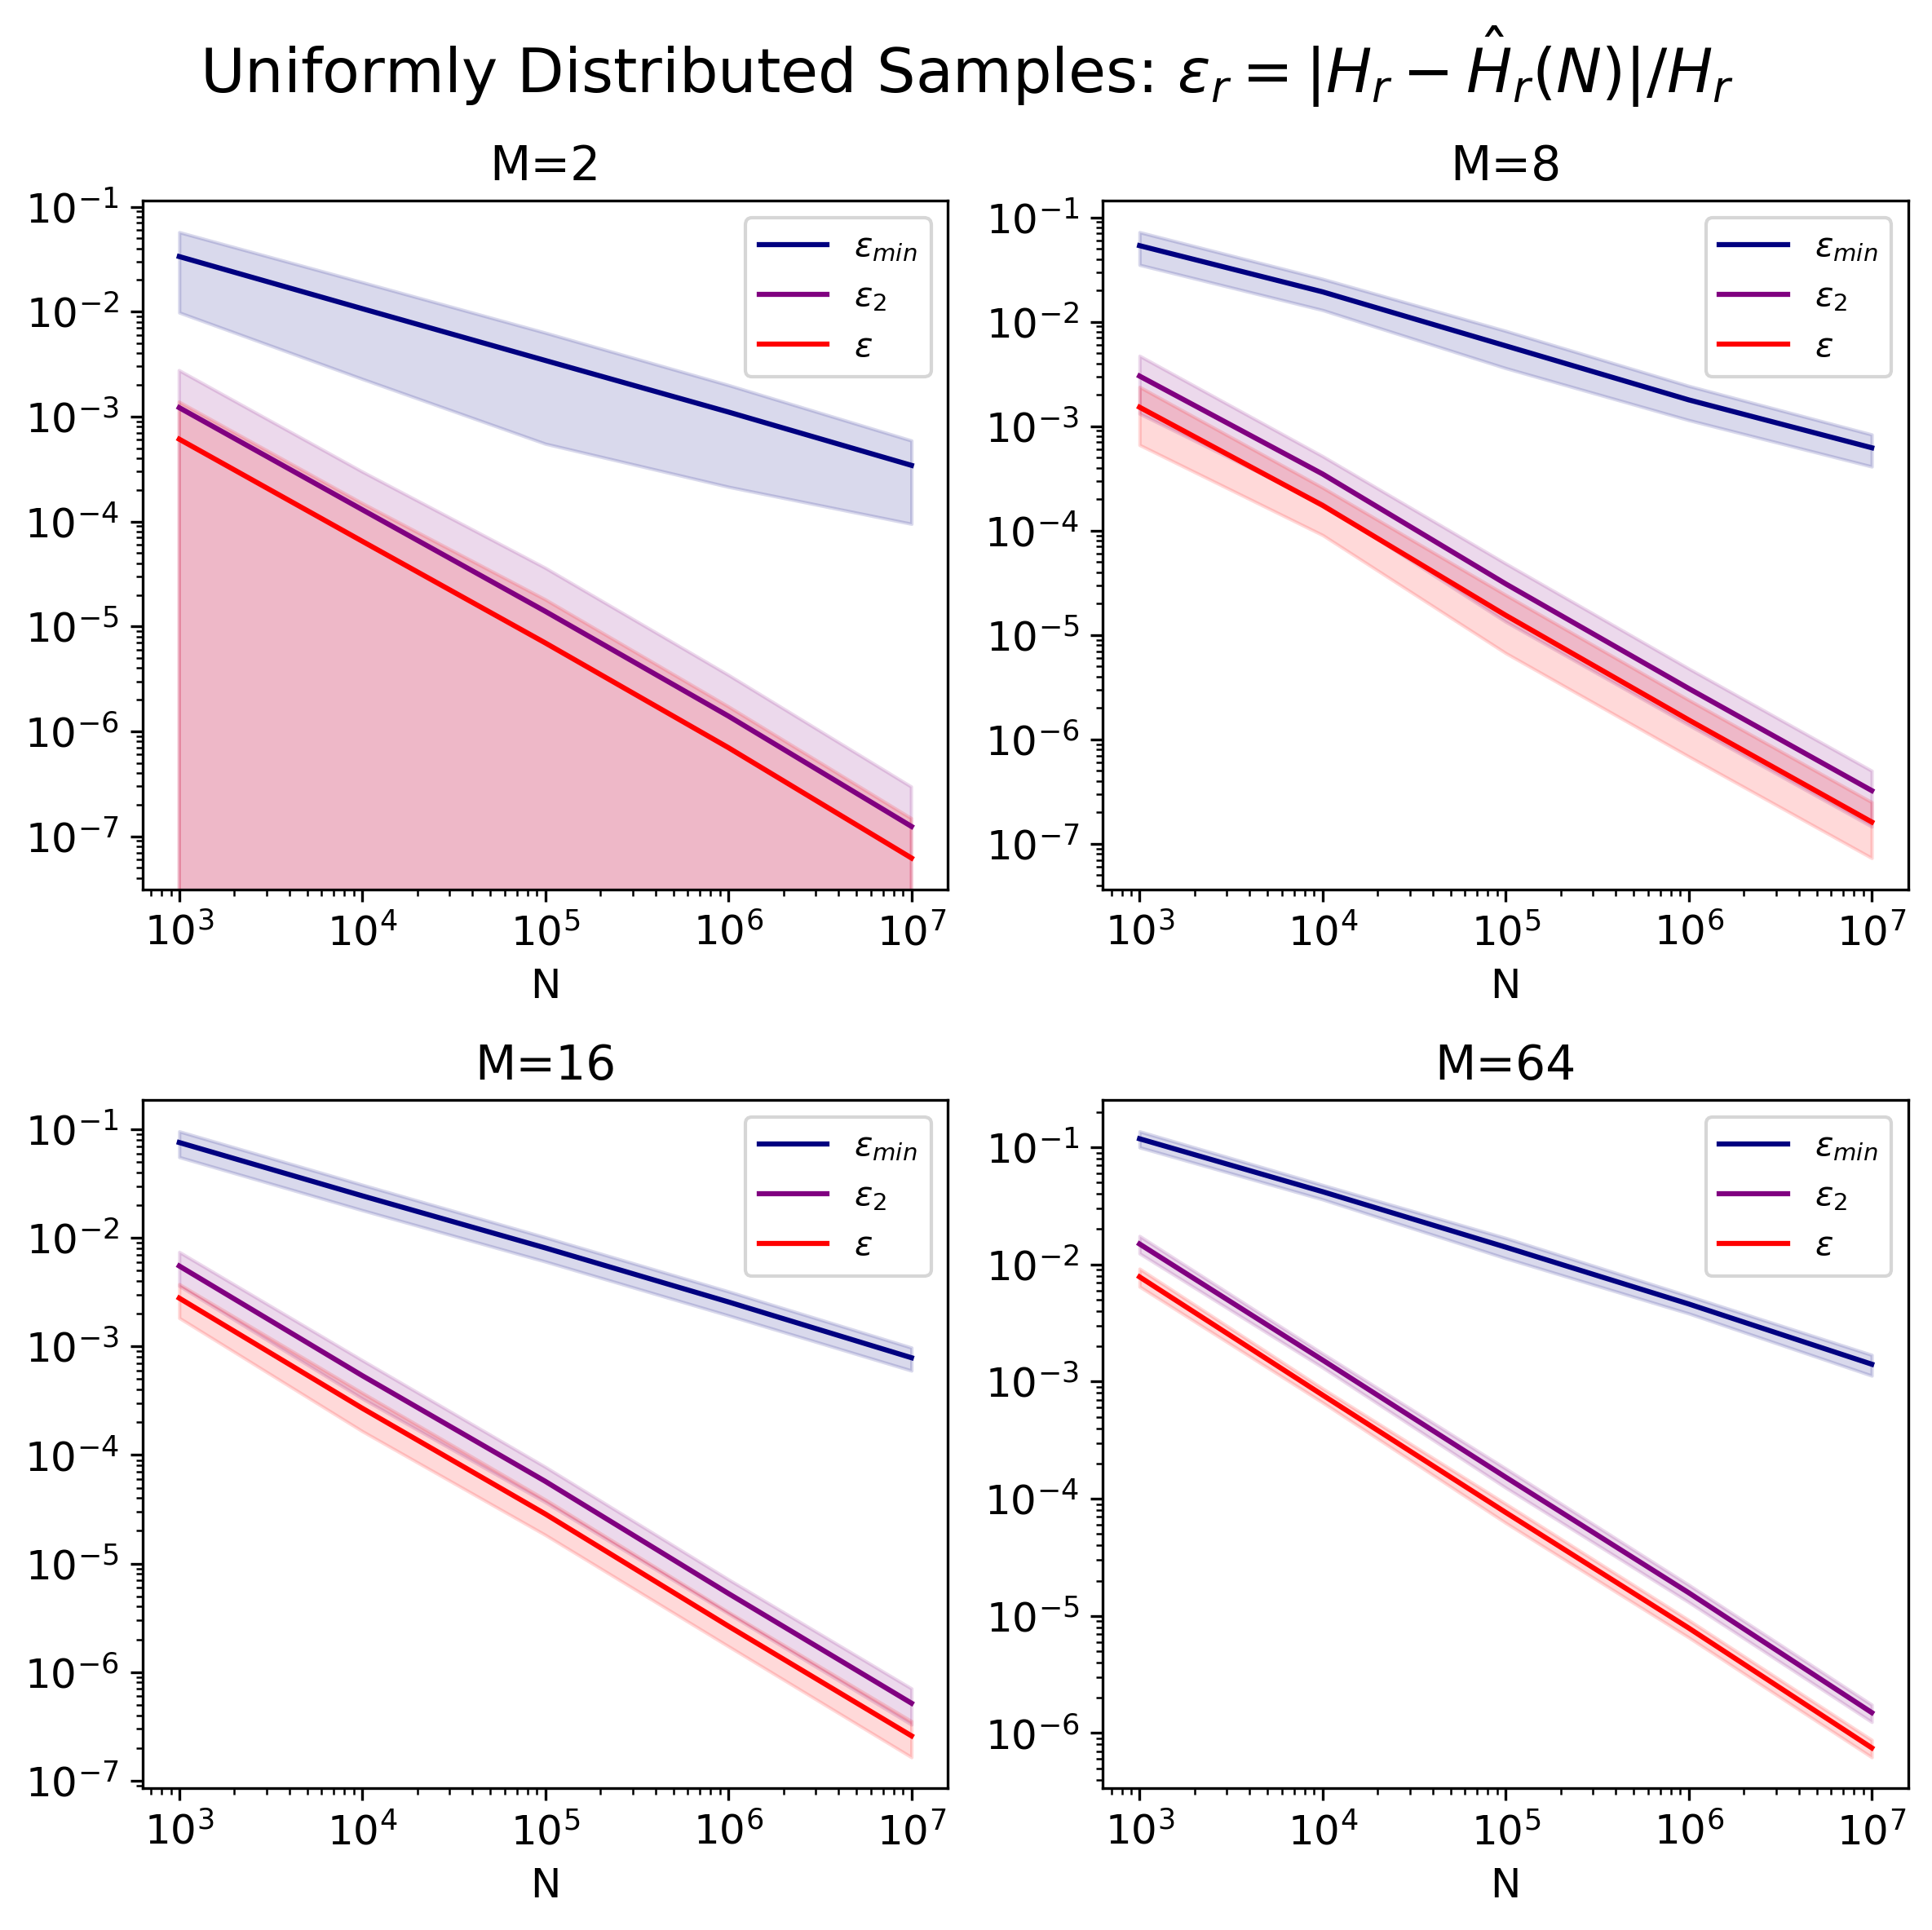

In [565]:
###test
def Theo_NominalEntropy(M):
    return np.log2(M)
    """
def Theo_CollisionEntropy(M):
    return np.log2(M)
def Theo_GuessingEntropy(M):
    return np.log2(M)
    """
#in the case of uniformly distributed variables the three 
#definitions coincide


M_range=np.array([2, 8, 16, 64])
N_range=np.array([10**x for x in range(3,8)])


H=[]
H2=[]
Hmin=[]

for n in range(100):
   H_data=[]
   H2_data=[]
   Hmin_data=[]
   for M in M_range:
      H_emp=[]
      H2_emp=[]
      Hmin_emp=[]
      for N in N_range:
         df=pmd(np.random.randint(low=0, high=M, size=N))
         H_emp.append(ShannonEntropy(df))
         H2_emp.append(CollisionEntropy(df))
         Hmin_emp.append(GuessingEntropy(df))
      H_data.append(H_emp)
      H2_data.append(H2_emp)
      Hmin_data.append(Hmin_emp)
   H.append(H_data)
   H2.append(H2_data)
   Hmin.append(Hmin_data)

H_mean=np.mean(H, axis=0)
H_sigma=np.sqrt(np.var(H, axis=0))
H2_mean=np.mean(H2, axis=0)
H2_sigma=np.sqrt(np.var(H2, axis=0))
Hmin_mean=np.mean(Hmin, axis=0)
Hmin_sigma=np.sqrt(np.var(Hmin, axis=0))

fig, ax= plt.subplots(2,2)
fig.set_dpi(300)
fig.suptitle("Uniformly Distributed Samples: $\epsilon_r=| H_r-\hat{H}_r(N) |/H_r$", fontsize=18)
fig.set_size_inches(8,8)
x=[0,0,1,1]
y=[0,1,0,1]
for i, M in enumerate(M_range):
   H_teo=Theo_NominalEntropy(M)
   a=np.abs(H_teo-Hmin_mean[i])/H_teo
   ax[x[i]][y[i]].plot(N_range, a, label="$\epsilon_{min}$", c="navy")
   ax[x[i]][y[i]].fill_between(N_range,a+Hmin_sigma[i]/H_teo,a-Hmin_sigma[i]/H_teo, color="navy",alpha=0.15)

   a= np.abs(H_teo-H2_mean[i])/H_teo
   ax[x[i]][y[i]].plot(N_range,a, label="$\epsilon_2$", c="purple")
   ax[x[i]][y[i]].fill_between(N_range,a+H2_sigma[i]/H_teo,a-H2_sigma[i]/H_teo,color="purple",alpha=0.15)

   a= np.abs(H_teo-H_mean[i])/H_teo
   ax[x[i]][y[i]].plot(N_range,a, label="$\epsilon$", c="red")
   ax[x[i]][y[i]].fill_between(N_range,a+H_sigma[i]/H_teo,a-H_sigma[i]/H_teo,color="red" ,alpha=0.15)

   ax[x[i]][y[i]].set_xscale("log")
   ax[x[i]][y[i]].set_yscale("log")
   ax[x[i]][y[i]].set_xlabel("N", fontsize=12)
   ax[x[i]][y[i]].set_title("M=%d" % M, fontsize=14)
   ax[x[i]][y[i]].tick_params(labelsize=12)
   ax[x[i]][y[i]].legend()

fig.set_tight_layout(True)

plt.show()


## 2.2 Binary Distribution

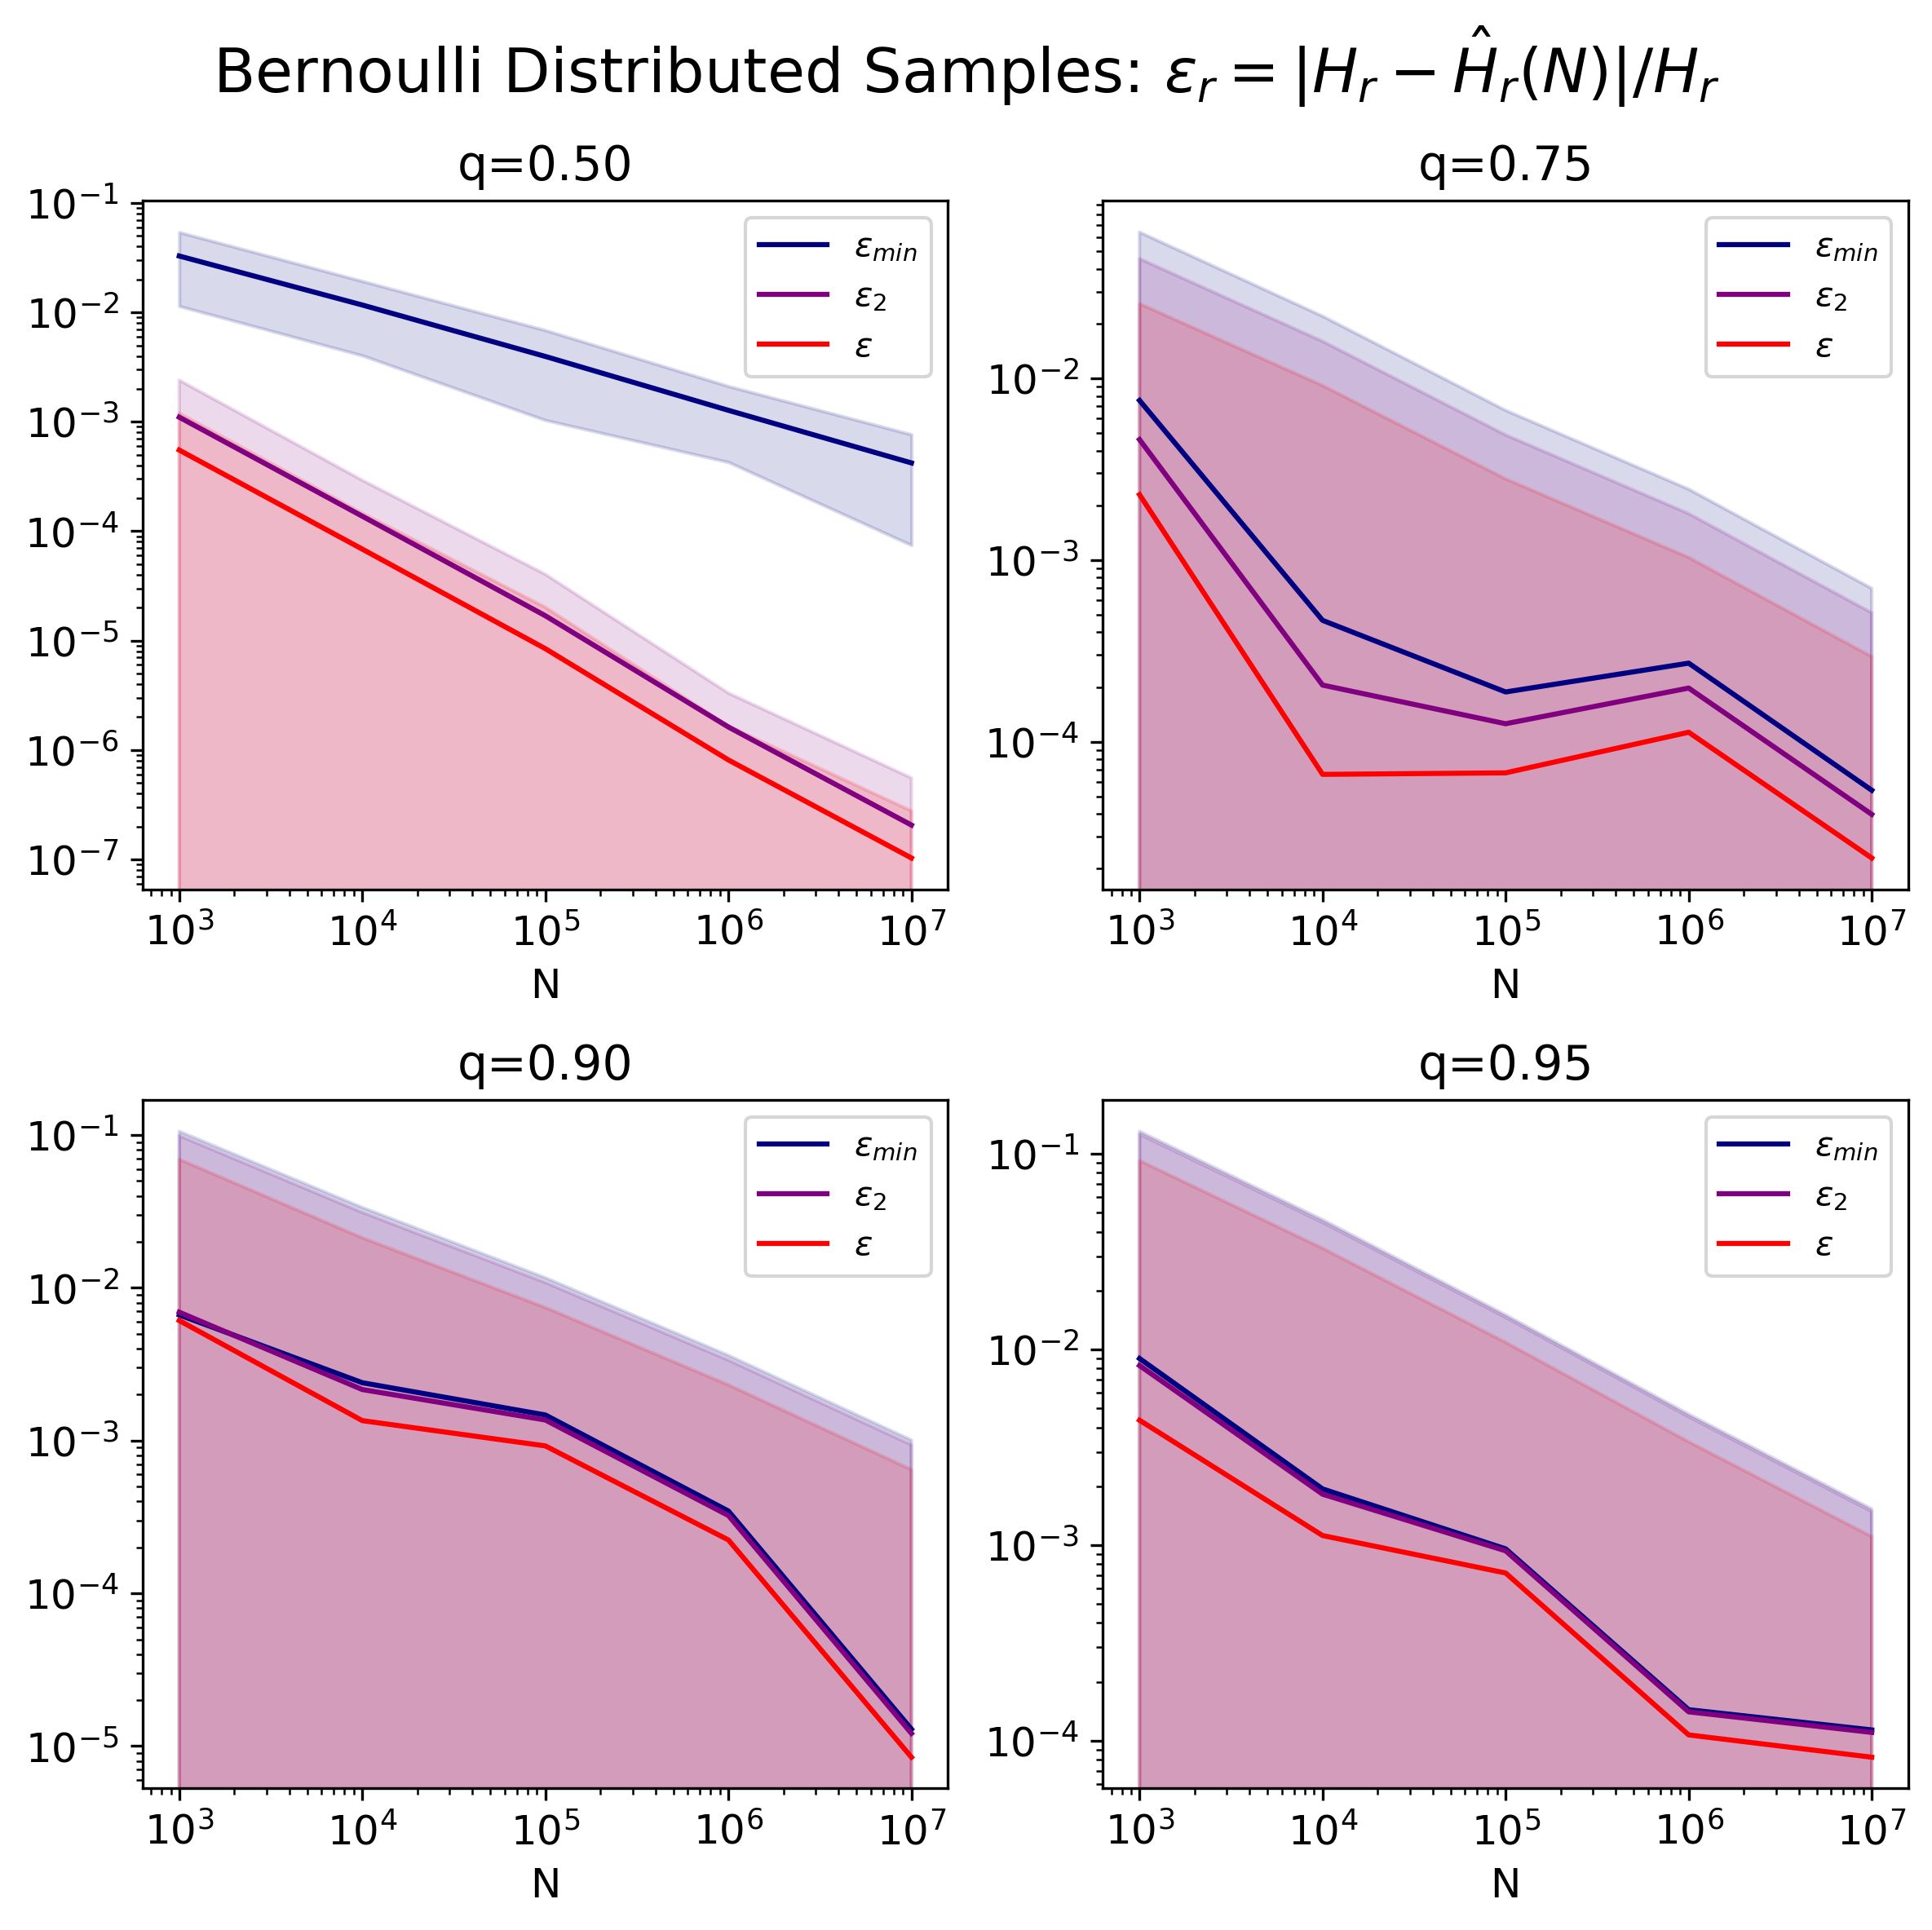

In [566]:
def Theo_ShannonEntropy(q):
    return -q*np.log2(q)-(1-q)*np.log2(1-q)
def Theo_CollisionEntropy(q):
    return -np.log2(q**2+(1-q)**2)
def Theo_GuessingEntropy(q):
    return np.min([-np.log2(q), -np.log2(1-q)])


q_range=np.array([0.5, 0.75, 0.9, 0.95])
N_range=np.array([10**x for x in range(3,8)])


H=[]
H2=[]
Hmin=[]

for n in range(100):
   H_data=[]
   H2_data=[]
   Hmin_data=[]
   for q in q_range:
      H_emp=[]
      H2_emp=[]
      Hmin_emp=[]
      for N in N_range:
         df=pmd(np.random.choice([0,1], p=[q, 1-q], size=N))
         H_emp.append(ShannonEntropy(df))
         H2_emp.append(CollisionEntropy(df))
         Hmin_emp.append(GuessingEntropy(df))
      H_data.append(H_emp)
      H2_data.append(H2_emp)
      Hmin_data.append(Hmin_emp)
   H.append(H_data)
   H2.append(H2_data)
   Hmin.append(Hmin_data)

H_mean=np.mean(H, axis=0)
H_sigma=np.sqrt(np.var(H, axis=0))
H2_mean=np.mean(H2, axis=0)
H2_sigma=np.sqrt(np.var(H2, axis=0))
Hmin_mean=np.mean(Hmin, axis=0)
Hmin_sigma=np.sqrt(np.var(Hmin, axis=0))

fig, ax= plt.subplots(2,2)
fig.set_dpi(300)
fig.suptitle("Bernoulli Distributed Samples: $\epsilon_r=|H_r-\hat{H}_r(N)|/H_r$", fontsize=18)
fig.set_size_inches(8,8)
x=[0,0,1,1]
y=[0,1,0,1]
for i, q in enumerate(q_range):
   H_teo=Theo_ShannonEntropy(q)
   H2_teo=Theo_CollisionEntropy(q)
   Hmin_teo=Theo_GuessingEntropy(q)
   
   a=np.abs(Hmin_teo-Hmin_mean[i])/Hmin_teo
   ax[x[i]][y[i]].plot(N_range, a, label="$\epsilon_{min}$", c="navy")
   ax[x[i]][y[i]].fill_between(N_range,a+Hmin_sigma[i]/Hmin_teo,a-Hmin_sigma[i]/Hmin_teo, color="navy",alpha=0.15)

   a= np.abs(H2_teo-H2_mean[i])/H2_teo
   ax[x[i]][y[i]].plot(N_range,a, label="$\epsilon_2$", c="purple")
   ax[x[i]][y[i]].fill_between(N_range,a+H2_sigma[i]/H2_teo,a-H2_sigma[i]/H2_teo,color="purple",alpha=0.15)

   a= np.abs(H_teo-H_mean[i])/H_teo
   ax[x[i]][y[i]].plot(N_range,a, label="$\epsilon$", c="red")
   ax[x[i]][y[i]].fill_between(N_range,a+H_sigma[i]/H_teo,a-H_sigma[i]/H_teo,color="red" ,alpha=0.15)

   ax[x[i]][y[i]].set_xscale("log")
   ax[x[i]][y[i]].set_yscale("log")
   ax[x[i]][y[i]].set_xlabel("N", fontsize=12)
   ax[x[i]][y[i]].set_title("q=%.2f" % q, fontsize=14)
   ax[x[i]][y[i]].tick_params(labelsize=12)
   ax[x[i]][y[i]].legend()

fig.set_tight_layout(True)

plt.show()


## 2.3 Geometric Distribution

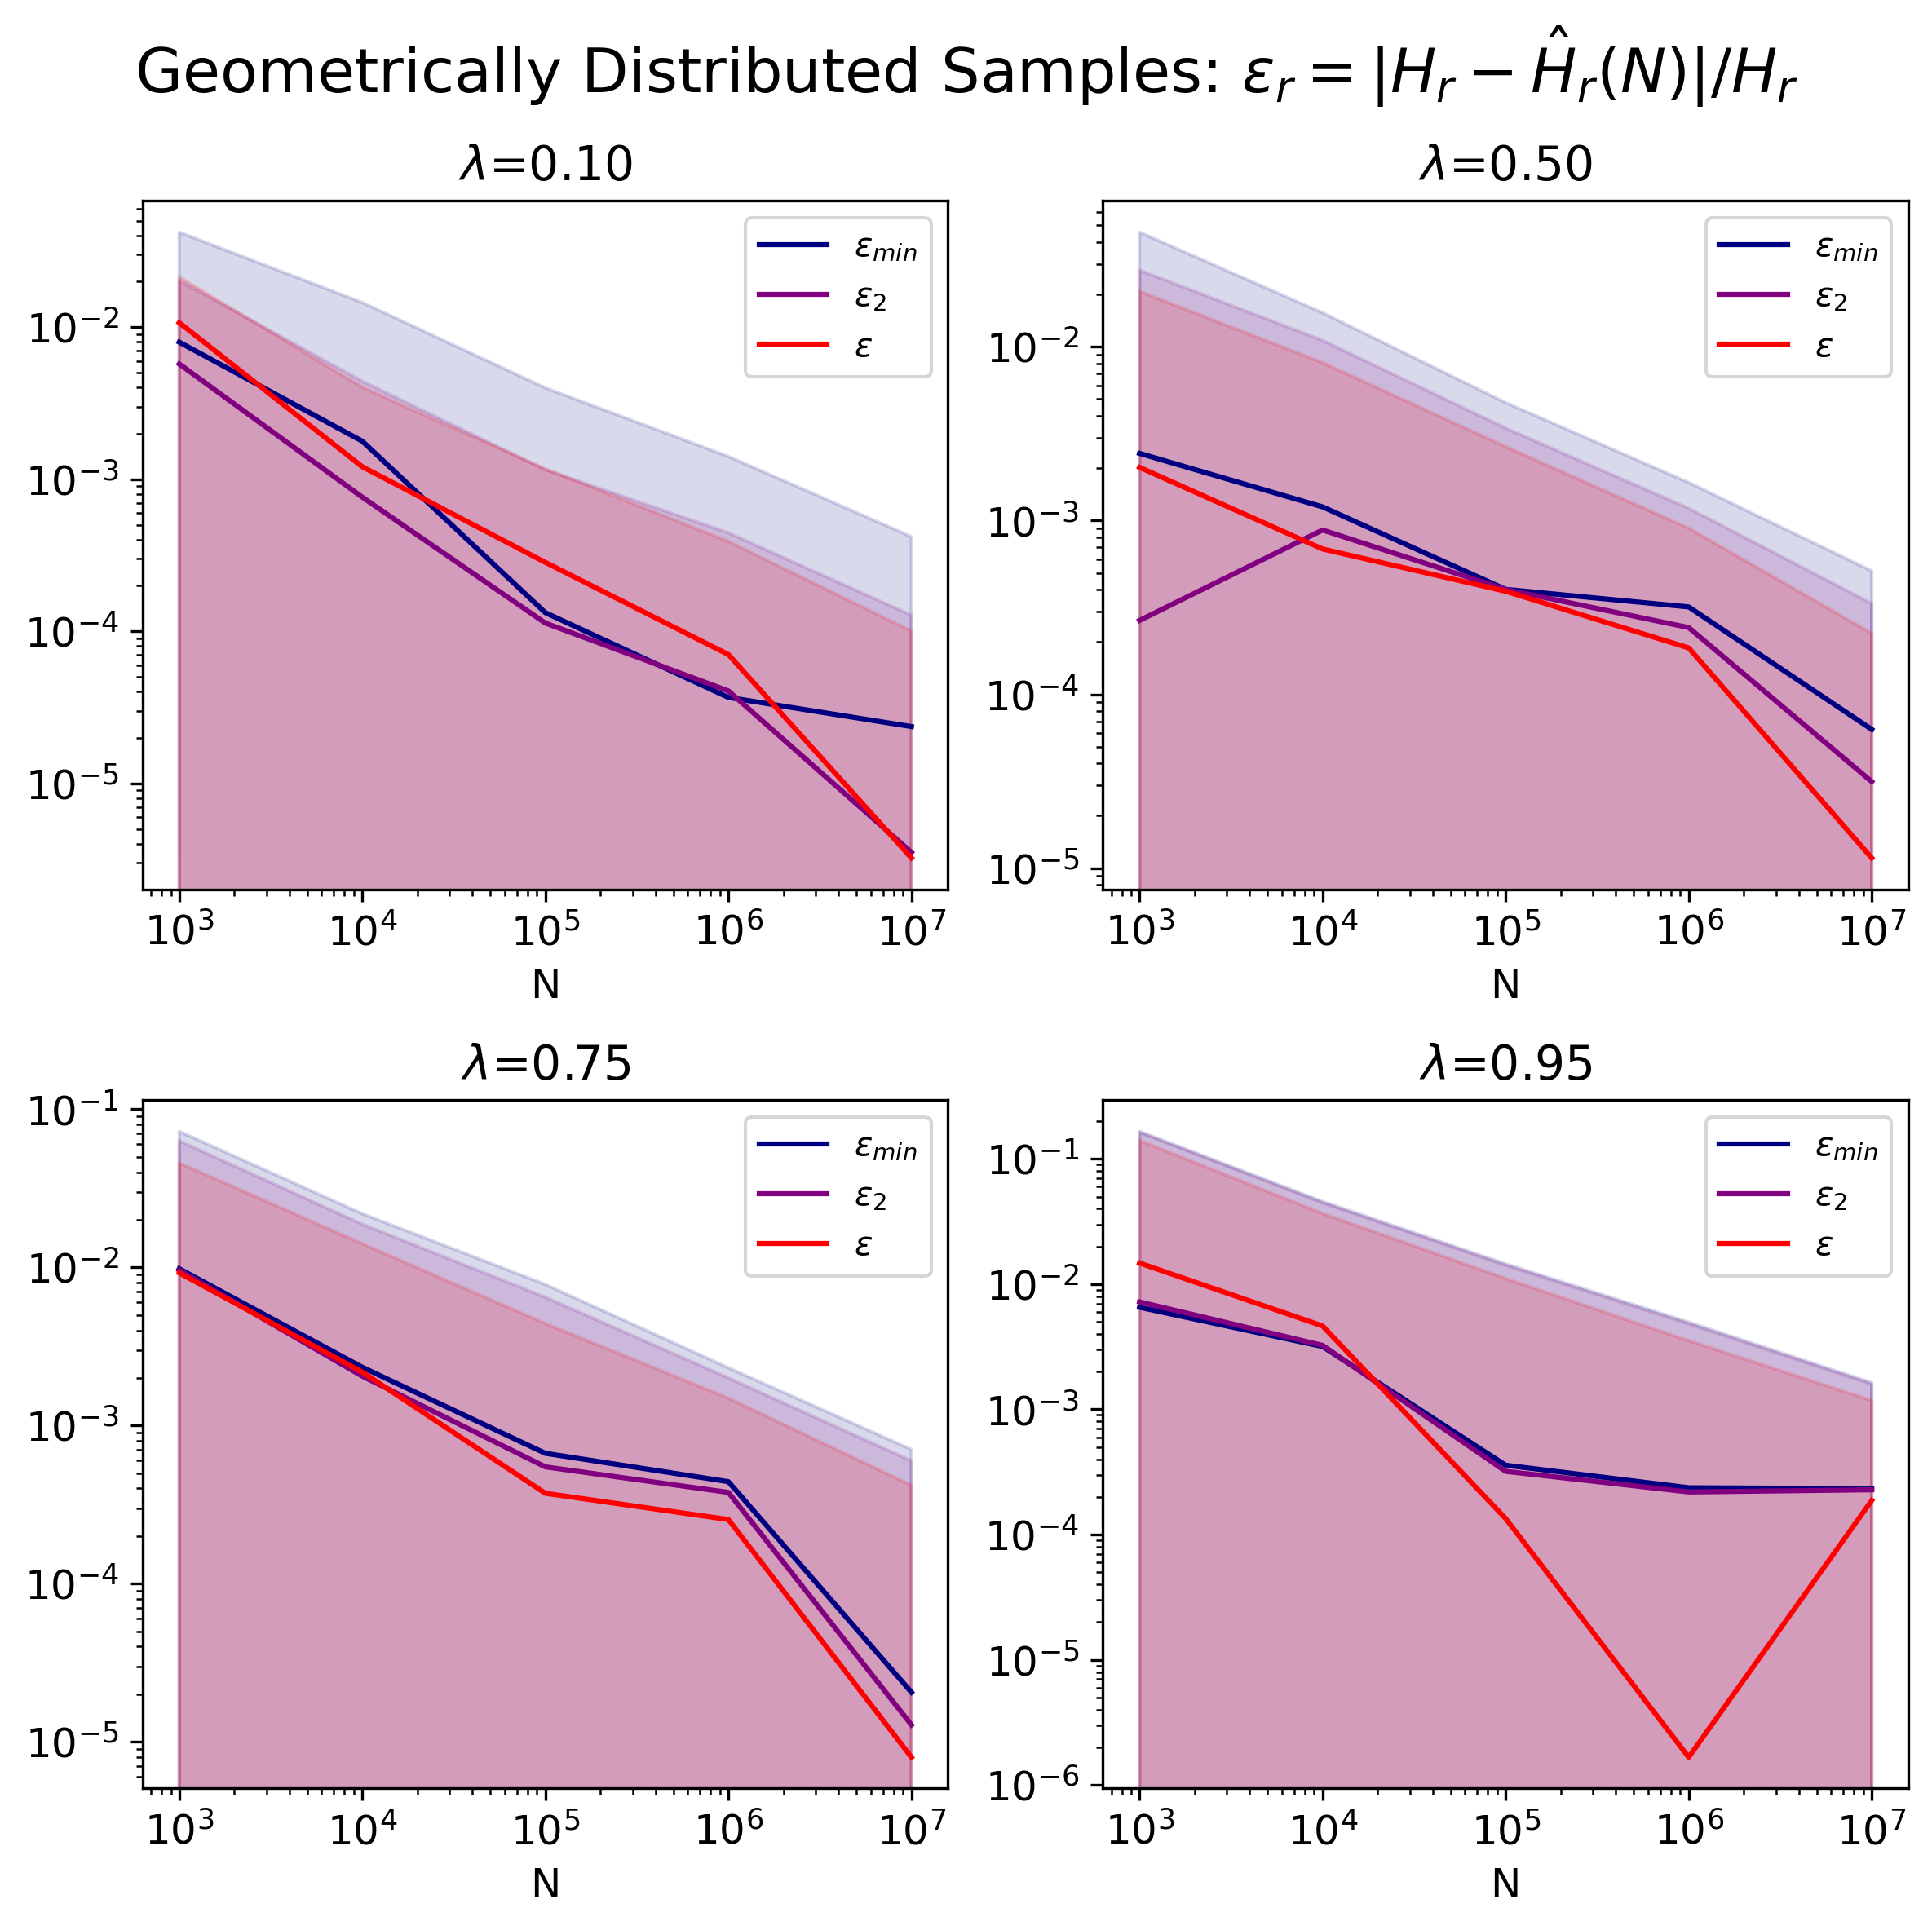

In [568]:
def Theo_ShannonEntropy(l):
    return -np.log2(l)-(1-l)/l*np.log2(1-l)
def Theo_CollisionEntropy(l):
    return -np.log2(l/(2-l))
def Theo_GuessingEntropy(l):
    return -np.log2(l)


l_range=np.array([0.1, 0.5, 0.75, 0.95])
N_range=np.array([10**x for x in range(3,8)])


H=[]
H2=[]
Hmin=[]

for n in range(100):
   H_data=[]
   H2_data=[]
   Hmin_data=[]
   for l in l_range:
      H_emp=[]
      H2_emp=[]
      Hmin_emp=[]
      for N in N_range:
         df=pmd(np.random.geometric(p=l, size=N))
         H_emp.append(ShannonEntropy(df))
         H2_emp.append(CollisionEntropy(df))
         Hmin_emp.append(GuessingEntropy(df))
      H_data.append(H_emp)
      H2_data.append(H2_emp)
      Hmin_data.append(Hmin_emp)
   H.append(H_data)
   H2.append(H2_data)
   Hmin.append(Hmin_data)

H_mean=np.mean(H, axis=0)
H_sigma=np.sqrt(np.var(H, axis=0))
H2_mean=np.mean(H2, axis=0)
H2_sigma=np.sqrt(np.var(H2, axis=0))
Hmin_mean=np.mean(Hmin, axis=0)
Hmin_sigma=np.sqrt(np.var(Hmin, axis=0))

fig, ax= plt.subplots(2,2)
fig.set_dpi(300)
fig.suptitle("Geometrically Distributed Samples: $\epsilon_r=| H_r-\hat{H}_r(N)|/H_r$", fontsize=18)
fig.set_size_inches(8,8)
x=[0,0,1,1]
y=[0,1,0,1]
for i, l in enumerate(l_range):
   H_teo=Theo_ShannonEntropy(l)
   H2_teo=Theo_CollisionEntropy(l)
   Hmin_teo=Theo_GuessingEntropy(l)
   
   a=np.abs(Hmin_teo-Hmin_mean[i])/Hmin_teo
   ax[x[i]][y[i]].plot(N_range, a, label="$\epsilon_{min}$", c="navy")
   ax[x[i]][y[i]].fill_between(N_range,a+Hmin_sigma[i]/Hmin_teo,a-Hmin_sigma[i]/Hmin_teo, color="navy",alpha=0.15)

   a= np.abs(H2_teo-H2_mean[i])/H2_teo
   ax[x[i]][y[i]].plot(N_range,a, label="$\epsilon_2$", c="purple")
   ax[x[i]][y[i]].fill_between(N_range,a+H2_sigma[i]/H2_teo,a-H2_sigma[i]/H2_teo,color="purple",alpha=0.15)

   a= np.abs(H_teo-H_mean[i])/H_teo
   ax[x[i]][y[i]].plot(N_range,a, label="$\epsilon$", c="red")
   ax[x[i]][y[i]].fill_between(N_range,a+H_sigma[i]/H_teo,a-H_sigma[i]/H_teo,color="red" ,alpha=0.15)

   ax[x[i]][y[i]].set_xscale("log")
   ax[x[i]][y[i]].set_yscale("log")
   ax[x[i]][y[i]].set_xlabel("N", fontsize=12)
   ax[x[i]][y[i]].set_title("$\lambda$=%.2f" % l, fontsize=14)
   ax[x[i]][y[i]].tick_params(labelsize=12)
   ax[x[i]][y[i]].legend()

fig.set_tight_layout(True)

plt.show()


# Ex 3

In [520]:
def pmds(sequence1, sequence2):
    alphabet1, count1= np.unique(sequence1, return_counts=True)
    alphabet2, count2= np.unique(sequence2, return_counts=True)
    freq1=count1/len(sequence1)
    freq2=count2/len(sequence2)

    joint_sequence=np.array([sequence1, sequence2]).T
    joint_alphabet, freq= np.unique(joint_sequence, axis=0, return_counts=True)
    freq=freq/(sum(freq))
    joint=np.zeros(shape=(len(alphabet1),len(alphabet2)))
    for k, value in enumerate(freq):
        i=np.where(alphabet1==joint_alphabet[k][0])[0][0] #[0][0] is to unpack the value of the index
        j=np.where(alphabet2==joint_alphabet[k][1])[0][0]
        joint[i][j]=value

    '''
    freq_1_given_2= joint.copy()
    for j in range(len(freq2)):
    freq_1_given_2[:,j]/=freq2[j]

    freq_2_given_1= joint.copy()
    for i in range(len(freq1)):
        freq_2_given_1[i,:]/=freq1[i]
    '''


    d={'alphabet 1': alphabet1, 'alphabet 2': alphabet2, 'freq 1': freq1, 'freq 2': freq2, 
        'joint freq': joint} # '1_given_2': freq_1_given_2, '2_given_1': freq_2_given_1}
    return d

In [524]:
def entropies(d):

    H_x=np.dot(d['freq 1'], -np.log2(d['freq 1']))
    H_y=np.dot(d['freq 2'], -np.log2(d['freq 2']))


    joint_pmd=d['joint freq'][d['joint freq']!=0].flatten()

    jointH=np.dot(joint_pmd, (-np.log2(joint_pmd)))
    x_given_y_H=jointH-H_y
    y_given_x_H=jointH-H_x
    
  

    H_x=np.dot(d['freq 1'], -np.log2(d['freq 1']))
    H_y=np.dot(d['freq 2'], -np.log2(d['freq 2']))

    I_x_y=H_x + H_y - jointH

    return {'H1':H_x, 'H2': H_y, 'joint H': jointH, '1_given_2_H': x_given_y_H, 
            '2_given_1_H': y_given_x_H, 'mutual info': I_x_y}

def KL_uniform(d):
    p_y=d['freq 2'][1:-1]
    p_x=d['freq 1']
    return np.dot(p_x, np.log2(p_x/p_y))

#def KL_geometric(d):



# Ex 4

## 4.1 Uniform Distribution

### Theorethical Values

In [ ]:
def theo_H_x(M): return np.log2(M)

def px(M): return 1/M

def py(M):
    p=np.ones(M+2)/M
    p[0]=1/(3*M)
    p[-1]=p[0]
    p[1]=2/(3*M)
    p[-2]=p[1]
    return p


def theo_H_y(M):
    p=py(M)
    return np.dot(p, -np.log2(p))

def theo_H_y_given_x(): return np.log2(3)

def theo_H_x_and_y(M): 
    return theo_H_y_given_x() + theo_H_x(M)

def theo_H_x_given_y(M): 
    return theo_H_x_and_y(M) - theo_H_y(M)

def theo_mutual_info(M):
    return theo_H_x(M) + theo_H_y(M) - theo_H_x_and_y(M)

def theo_KL_divergence_Unif(M):
    p_y=py(M)[1:-1]
    p_x=np.ones(M)*px(M)
    return np.dot(p_x, np.log2(p_x/p_y))

#def theo_KL_divergence_Geom(M):
#    return np.dot(p_x, np.log2(p_x/p_y))


### Relative errors vs N

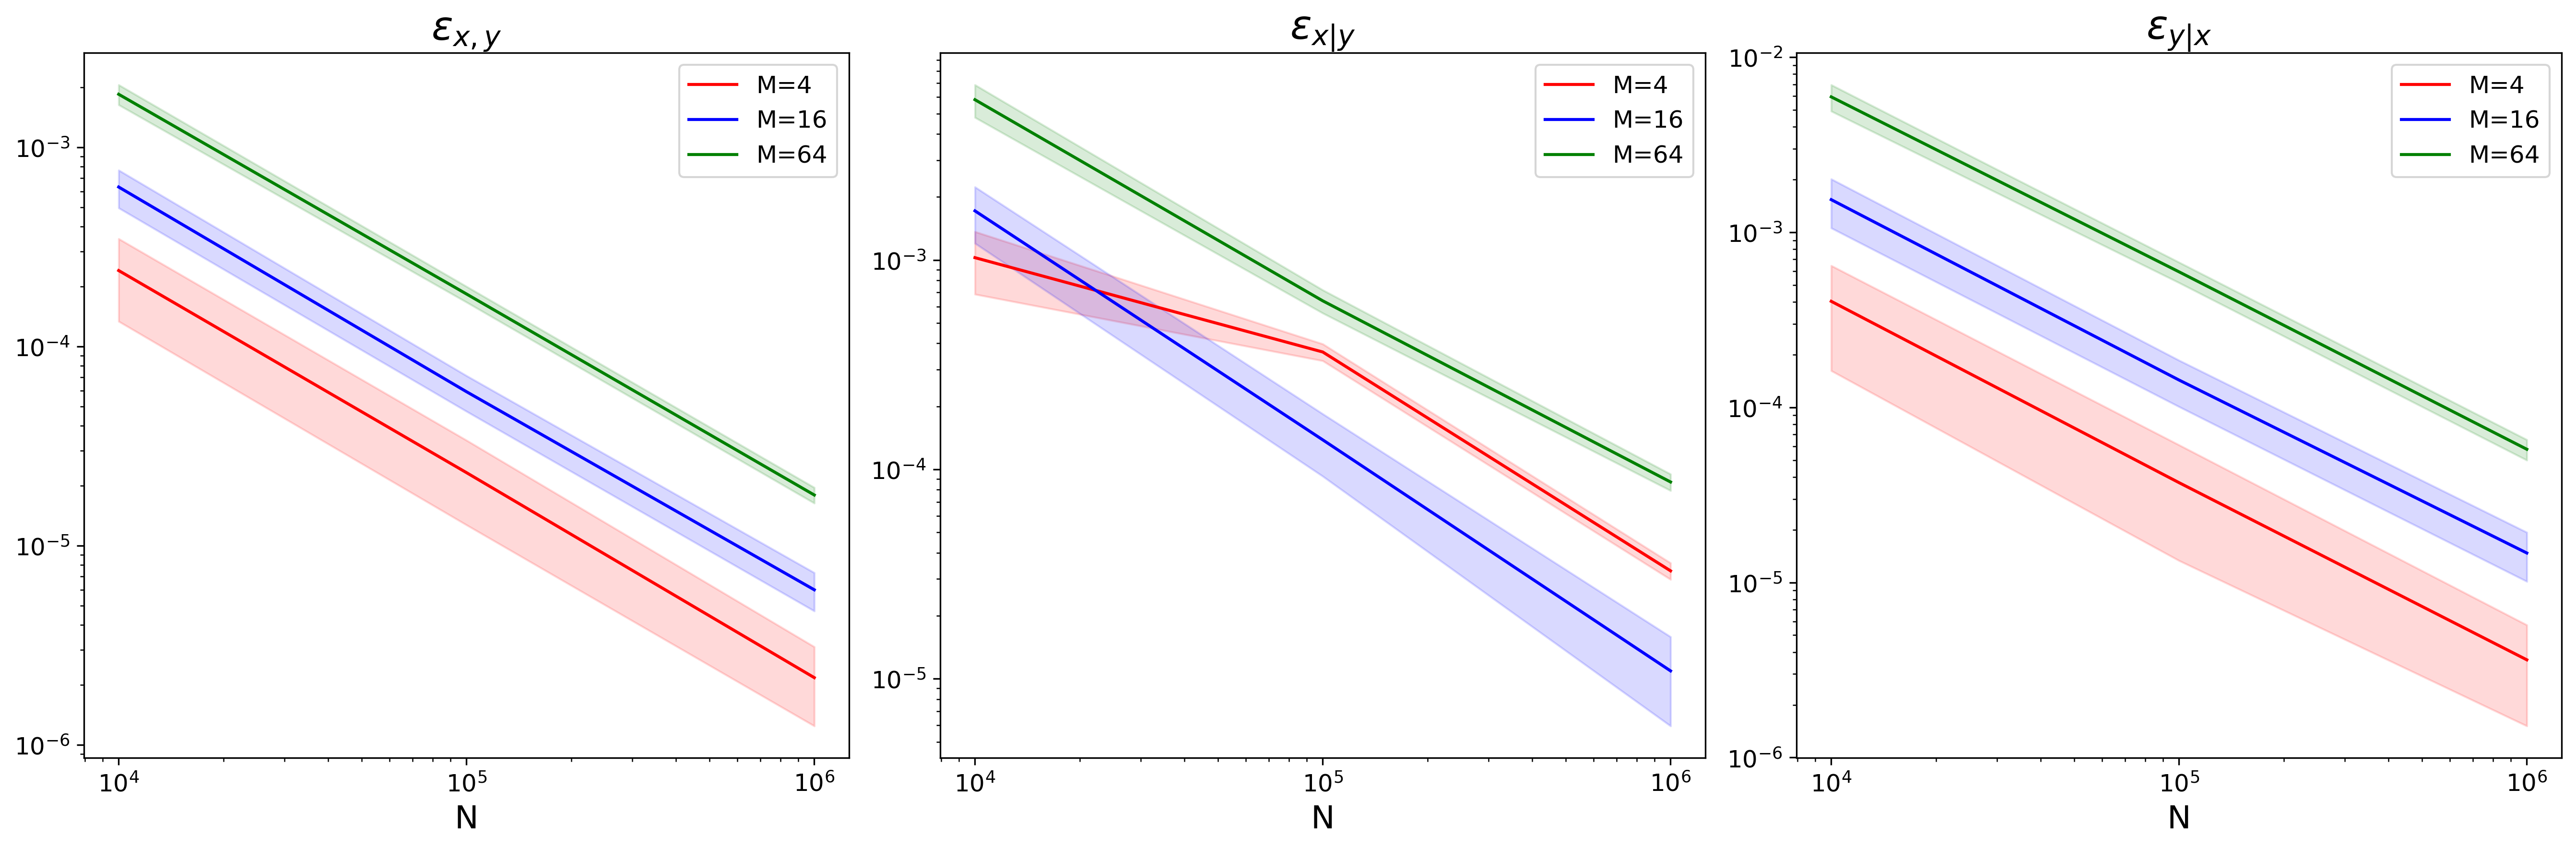

In [580]:
M_range=np.array([4, 16, 64])
N_range=np.array([10**x for x in range(4,7)])

joint=[]
x_given_y=[]
y_given_x=[]
mutual=[]
KL=[]

for n in range(100):
    joint_data=[]
    x_given_y_data=[]
    y_given_x_data=[]
    mutual_data=[]
    KL_data=[]
    for N in N_range:
        joint_emp=[]
        x_given_y_emp=[]
        y_given_x_emp=[]
        mutual_emp=[]
        KL_emp=[]
        for M in M_range:
            x=np.random.randint(low=0, high=M, size=N)
            z=np.random.randint(low=-1, high=2, size=N)
            y=x+z
            d=pmds(x,y)
            H=entropies(d)
            joint_emp.append(H['joint H'])
            x_given_y_emp.append(H['1_given_2_H'])
            y_given_x_emp.append(H['2_given_1_H'])
            mutual_emp.append(H['mutual info'])
            KL_emp.append(KL_uniform(d))
        joint_data.append(joint_emp)
        x_given_y_data.append(x_given_y_emp)
        y_given_x_data.append(y_given_x_emp)
        mutual_data.append(mutual_emp)
        KL_data.append(KL_emp)
            
    joint.append(np.array(joint_data).T)
    x_given_y.append(np.array(x_given_y_data).T)
    y_given_x.append(np.array(y_given_x_data).T)
    mutual.append(np.array(mutual_data).T)
    KL.append(np.array(KL_data).T)

joint_mean=np.mean(joint, axis=0)
joint_sigma=np.sqrt(np.var(joint, axis=0))
x_given_y_mean=np.mean(x_given_y, axis=0)
x_given_y_sigma=np.sqrt(np.mean(x_given_y, axis=0))
y_given_x_mean=np.mean(y_given_x, axis=0)
y_given_x_sigma=np.sqrt(np.mean(y_given_x, axis=0))
mutual_mean=np.mean(mutual, axis=0)
mutual_sigma=np.sqrt(np.var(mutual, axis=0))
KL_mean=np.mean(KL, axis=0)
KL_sigma=np.sqrt(np.var(KL, axis=0))



fig, ax= plt.subplots(1,3)
fig.set_dpi(300)
#fig.suptitle("Uniformly Distributed Samples", fontsize=18)
fig.set_size_inches(18,6)

colors=['red', 'blue', 'green']
for k,M in enumerate(M_range):
    ax[0].set_title("$\epsilon_{x,y}$", fontsize=20)
    a=np.abs(joint_mean[k]-theo_H_x_and_y(M))/theo_H_x_and_y(M)
    ax[0].plot(N_range, a, c=colors[k], label="M=%d" % M)
    ax[0].fill_between(N_range, a+joint_sigma[k]/theo_H_x_and_y(M),a-joint_sigma[k]/theo_H_x_and_y(M),
                        color=colors[k], alpha=0.15)
    ax[0].set_xscale("log")
    ax[0].set_yscale("log")
    ax[0].set_xlabel("N", fontsize=16)
    ax[0].tick_params(labelsize=12)

    ax[1].set_title("$\epsilon_{x|y}$", fontsize=20)
    a=np.abs(x_given_y_mean[k]-theo_H_x_given_y(M))/theo_H_x_given_y(M)
    ax[1].plot(N_range, a, c=colors[k], label="M=%d" % M)
    ax[1].fill_between(N_range, a+joint_sigma[k]/theo_H_x_given_y(M),a-joint_sigma[k]/theo_H_x_given_y(M),
                        color=colors[k], alpha=0.15)
    ax[1].set_xscale("log")
    ax[1].set_yscale("log")
    ax[1].set_xlabel("N", fontsize=16)
    ax[1].tick_params(labelsize=12)

    ax[2].set_title("$\epsilon_{y|x}$", fontsize=20)
    a=np.abs(y_given_x_mean[k]-theo_H_y_given_x())/theo_H_y_given_x()
    ax[2].plot(N_range, a , c=colors[k], label="M=%d" % M)
    ax[2].fill_between(N_range, a+joint_sigma[k]/theo_H_y_given_x(),a-joint_sigma[k]/theo_H_y_given_x(),
                         color=colors[k],alpha=0.15)

    ax[2].set_xscale("log")
    ax[2].set_yscale("log")
    ax[2].set_xlabel("N", fontsize=16)
    ax[2].tick_params(labelsize=12)

ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
ax[2].legend(fontsize=12)
fig.set_tight_layout(True)
plt.show()


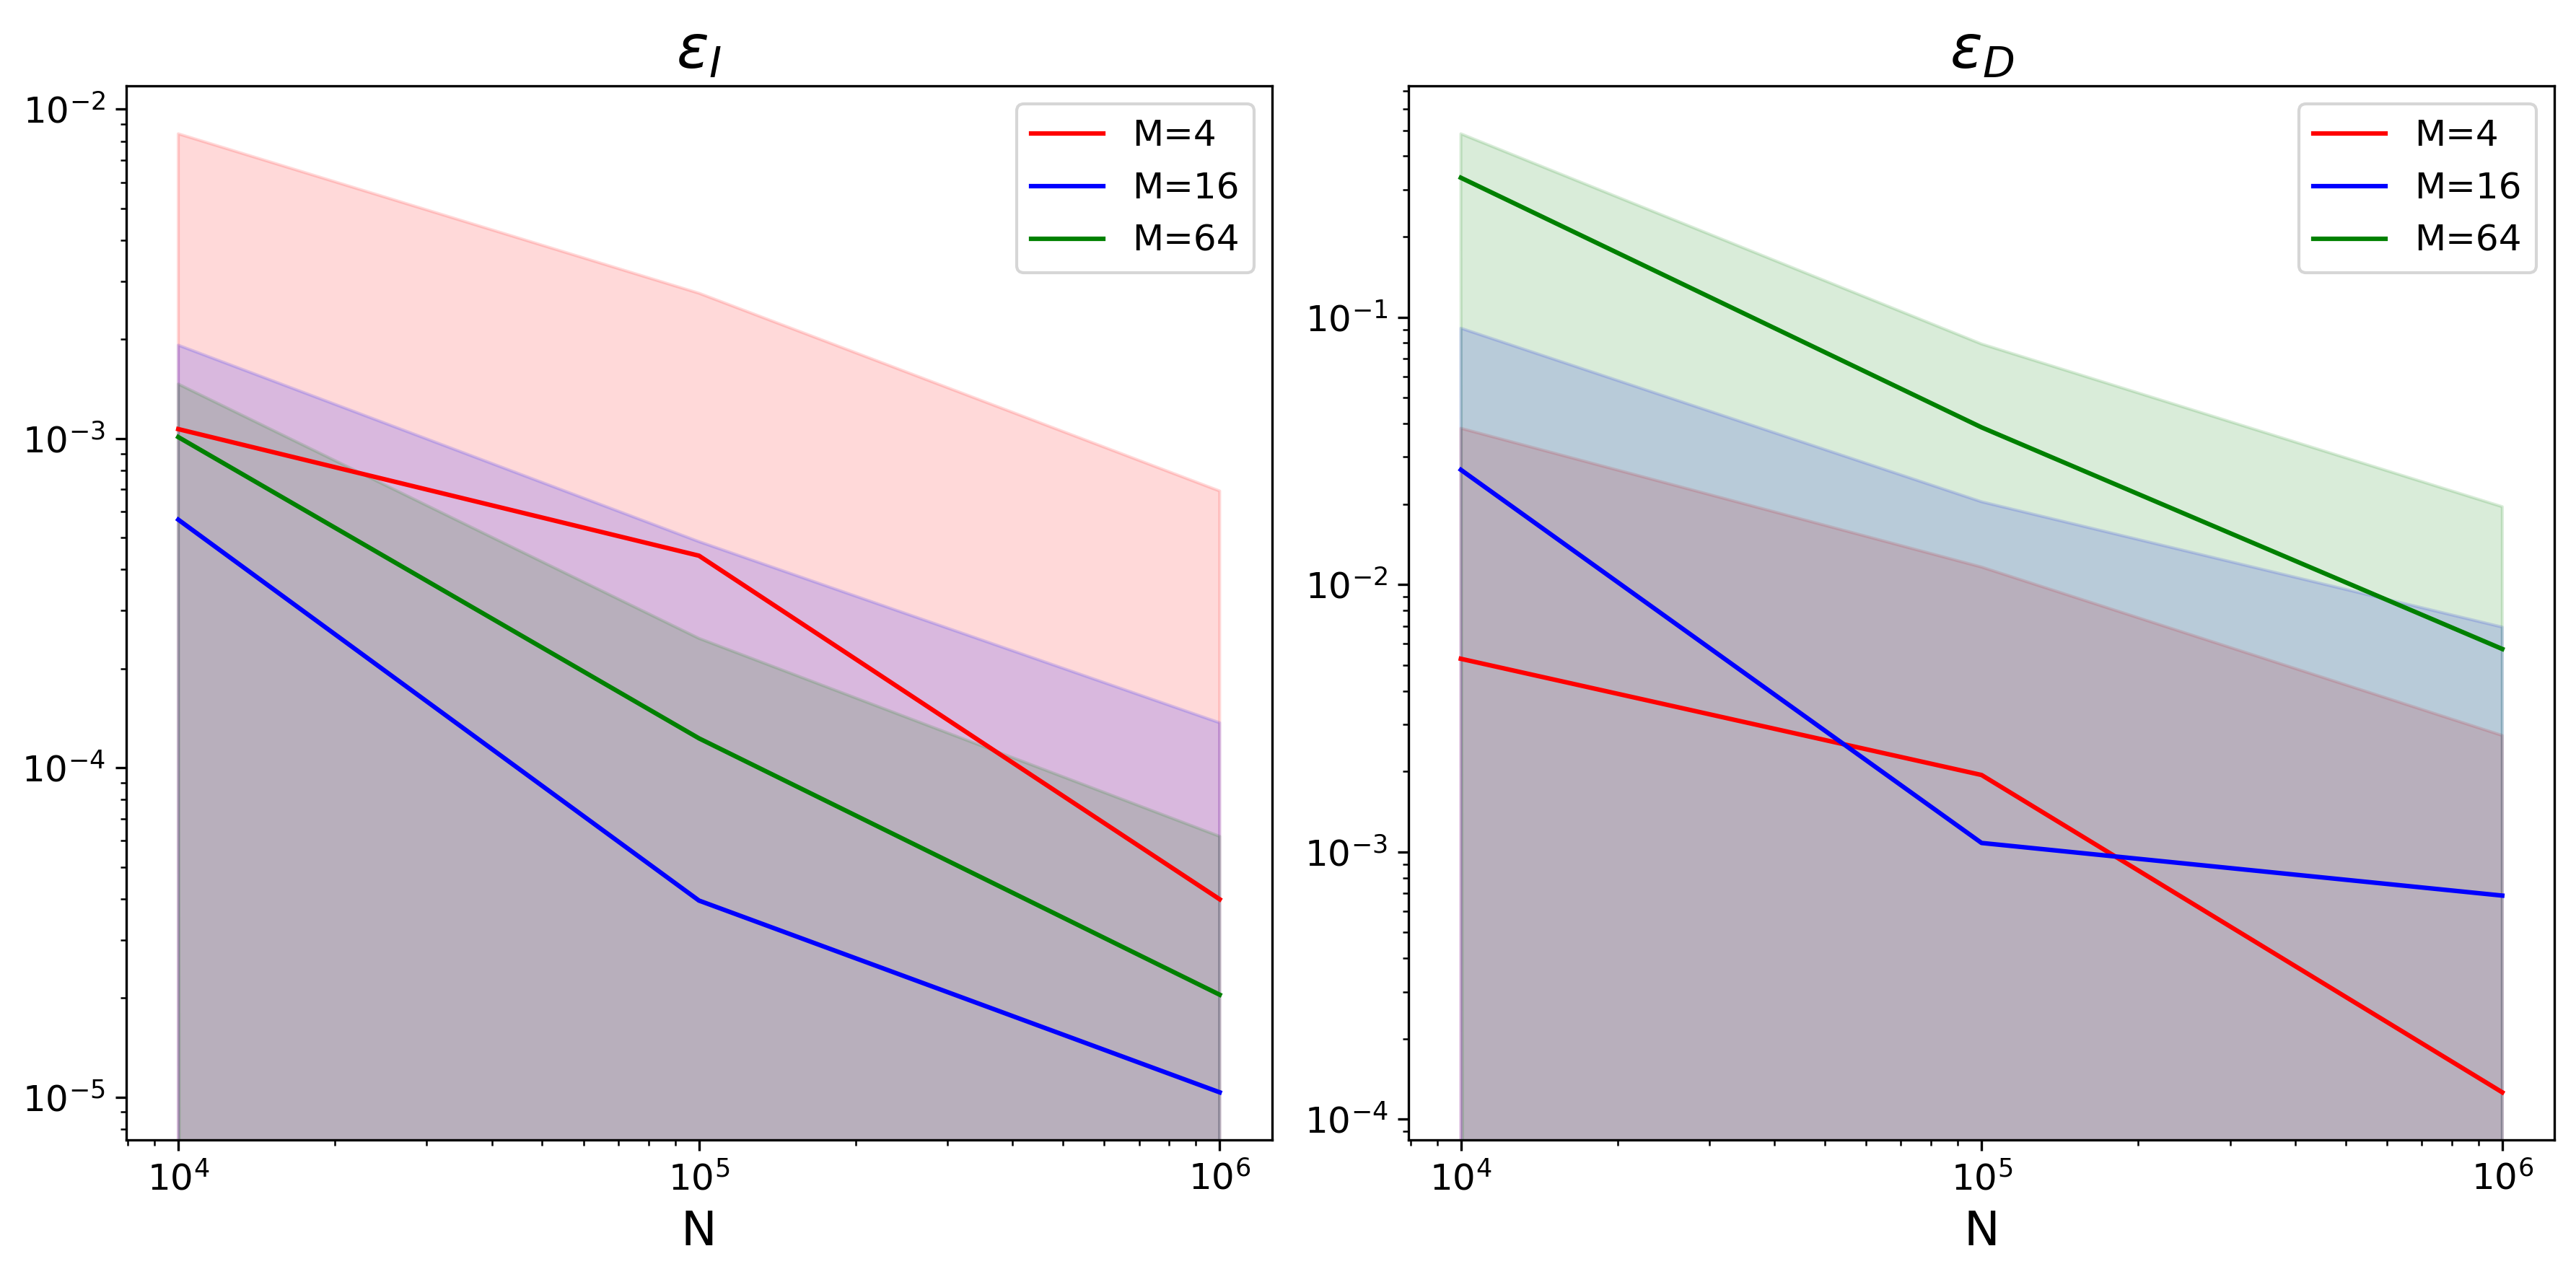

In [582]:
fig, ax= plt.subplots(1,2)
fig.set_dpi(300)
fig.set_size_inches(12,6)

colors=['red', 'blue', 'green']
for k,M in enumerate(M_range):
    ax[0].set_title("$\epsilon_{I}$", fontsize=20)
    a=np.abs(mutual_mean[k]-theo_mutual_info(M))/theo_mutual_info(M)
    ax[0].plot(N_range, a, c=colors[k], label="M=%d" % M)
    ax[0].fill_between(N_range, a+mutual_sigma[k]/theo_mutual_info(M),a-mutual_sigma[k]/theo_mutual_info(M),
                        color=colors[k], alpha=0.15)
    ax[0].set_xscale("log")
    ax[0].set_yscale("log")
    ax[0].set_xlabel("N", fontsize=16)
    ax[0].tick_params(labelsize=12)

    ax[1].set_title("$\epsilon_{D}$", fontsize=20)
    a= np.abs(KL_mean[k]-theo_KL_divergence(M))/theo_KL_divergence(M)
    ax[1].plot(N_range,a, c=colors[k], label="M=%d" % M)
    ax[1].fill_between(N_range, a+KL_sigma[k]/theo_KL_divergence(M),a-KL_sigma[k]/theo_KL_divergence(M),
                        color=colors[k], alpha=0.15)
    ax[1].set_xscale("log")
    ax[1].set_yscale("log")
    ax[1].set_xlabel("N", fontsize=16)
    ax[1].tick_params(labelsize=12)

    
ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
fig.set_tight_layout(True)
plt.show()


### Entropies vs M

## 4.2 Geometric Distribution

### Theoretical Values

In [ ]:
#change everything
def theo_H_x(M): return np.log2(M)

def px(M): return 1/M

def py(M):
    p=np.ones(M+2)/M
    p[0]=1/(3*M)
    p[-1]=p[0]
    p[1]=2/(3*M)
    p[-2]=p[1]
    return p


def theo_H_y(M):
    p=py(M)
    return np.dot(p, -np.log2(p))

def theo_H_y_given_x(): return np.log2(3)

def theo_H_x_and_y(M): 
    return theo_H_y_given_x() + theo_H_x(M)

def theo_H_x_given_y(M): 
    return theo_H_x_and_y(M) - theo_H_y(M)

def theo_mutual_info(M):
    return theo_H_x(M) + theo_H_y(M) - theo_H_x_and_y(M)


#def theo_KL_divergence_Geom(M):
#    return np.dot(p_x, np.log2(p_x/p_y))


In [ ]:
# do everything
lx_range=np.array([0.1, 0.25, 0.5])
ly_range=np.array([0.5, 0.75, 0.9])

N_range=np.array([10**x for x in range(4,7)])

joint=[]
x_given_y=[]
y_given_x=[]
mutual=[]
KL=[]

for n in range(100):
    joint_data=[]
    x_given_y_data=[]
    y_given_x_data=[]
    mutual_data=[]
    KL_data=[]
    for N in N_range:
        joint_emp=[]
        x_given_y_emp=[]
        y_given_x_emp=[]
        mutual_emp=[]
        KL_emp=[]
        for lx in lx_range:
            for ly in ly_range:
                x=np.random.geometric(p=lx, size=N)
                y=np.random.geometric(p=ly, size=N)
                d=pmds(x,y)
                H=entropies(d)
                joint_emp.append(H['joint H'])
                x_given_y_emp.append(H['1_given_2_H'])
                y_given_x_emp.append(H['2_given_1_H'])
                mutual_emp.append(H['mutual info'])
                KL_emp.append(KL_uniform(d))
        joint_data.append(joint_emp)
        x_given_y_data.append(x_given_y_emp)
        y_given_x_data.append(y_given_x_emp)
        mutual_data.append(mutual_emp)
        KL_data.append(KL_emp)
            
    joint.append(np.array(joint_data).T)
    x_given_y.append(np.array(x_given_y_data).T)
    y_given_x.append(np.array(y_given_x_data).T)
    mutual.append(np.array(mutual_data).T)
    KL.append(np.array(KL_data).T)

joint_mean=np.mean(joint, axis=0)
joint_sigma=np.sqrt(np.var(joint, axis=0))
x_given_y_mean=np.mean(x_given_y, axis=0)
x_given_y_sigma=np.sqrt(np.mean(x_given_y, axis=0))
y_given_x_mean=np.mean(y_given_x, axis=0)
y_given_x_sigma=np.sqrt(np.mean(y_given_x, axis=0))
mutual_mean=np.mean(mutual, axis=0)
mutual_sigma=np.sqrt(np.var(mutual, axis=0))
KL_mean=np.mean(KL, axis=0)
KL_sigma=np.sqrt(np.var(KL, axis=0))



fig, ax= plt.subplots(1,9)
fig.set_dpi(300)
#fig.suptitle("Uniformly Distributed Samples", fontsize=18)
fig.set_size_inches(18,6)

colors=['red', 'blue', 'green']
for k,M in enumerate(M_range):
    ax[0].set_title("$\epsilon_{x,y}$", fontsize=20)
    a=np.abs(joint_mean[k]-theo_H_x_and_y(M))/theo_H_x_and_y(M)
    ax[0].plot(N_range, a, c=colors[k], label="$\lambda_x$=%.2f ," % lx_range[0] + "$\lambda_y$=%.2f" % ly_range[0])
    ax[0].fill_between(N_range, a+joint_sigma[k]/theo_H_x_and_y(M),a-joint_sigma[k]/theo_H_x_and_y(M),
                        color=colors[k], alpha=0.15)
    ax[0].set_xscale("log")
    ax[0].set_yscale("log")
    ax[0].set_xlabel("N", fontsize=16)
    ax[0].tick_params(labelsize=12)

    ax[1].set_title("$\epsilon_{x|y}$", fontsize=20)
    a=np.abs(x_given_y_mean[k]-theo_H_x_given_y(M))/theo_H_x_given_y(M)
    ax[1].plot(N_range, a, c=colors[k], label="$\lambda_x$=%.2f ," % lx_range[0] + "$\lambda_y$=%.2f" % ly_range[1])
    ax[1].fill_between(N_range, a+joint_sigma[k]/theo_H_x_given_y(M),a-joint_sigma[k]/theo_H_x_given_y(M),
                        color=colors[k], alpha=0.15)
    ax[1].set_xscale("log")
    ax[1].set_yscale("log")
    ax[1].set_xlabel("N", fontsize=16)
    ax[1].tick_params(labelsize=12)

    ax[2].set_title("$\epsilon_{y|x}$", fontsize=20)
    a=np.abs(y_given_x_mean[k]-theo_H_y_given_x())/theo_H_y_given_x()
    ax[2].plot(N_range, a , c=colors[k], label="$\lambda_x$=%.2f ," % lx_range[0] + "$\lambda_y$=%.2f" % ly_range[3])
    ax[2].fill_between(N_range, a+joint_sigma[k]/theo_H_y_given_x(),a-joint_sigma[k]/theo_H_y_given_x(),
                         color=colors[k],alpha=0.15)

    ax[2].set_xscale("log")
    ax[2].set_yscale("log")
    ax[2].set_xlabel("N", fontsize=16)
    ax[2].tick_params(labelsize=12)

    #ax[3]...
    #ax[4]...
    #ax[5]...

ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
ax[2].legend(fontsize=12)
ax[3].legend(fontsize=12)
ax[4].legend(fontsize=12)
ax[5].legend(fontsize=12)

#ax.reshape(3,3)
fig.set_tight_layout(True)
plt.show()


In [ ]:
fig, ax= plt.subplots(1,2)
fig.set_dpi(300)
fig.set_size_inches(12,6)

colors=['red', 'blue', 'green']
for k,M in enumerate(M_range):
    ax[0].set_title("$\epsilon_{I}$", fontsize=20)
    a=np.abs(mutual_mean[k]-theo_mutual_info(M))/theo_mutual_info(M)
    ax[0].plot(N_range, a, c=colors[k], label="M=%d" % M)
    ax[0].fill_between(N_range, a+mutual_sigma[k]/theo_mutual_info(M),a-mutual_sigma[k]/theo_mutual_info(M),
                        color=colors[k], alpha=0.15)
    ax[0].set_xscale("log")
    ax[0].set_yscale("log")
    ax[0].set_xlabel("N", fontsize=16)
    ax[0].tick_params(labelsize=12)

    ax[1].set_title("$\epsilon_{D}$", fontsize=20)
    a= np.abs(KL_mean[k]-theo_KL_divergence(M))/theo_KL_divergence(M)
    ax[1].plot(N_range,a, c=colors[k], label="M=%d" % M)
    ax[1].fill_between(N_range, a+KL_sigma[k]/theo_KL_divergence(M),a-KL_sigma[k]/theo_KL_divergence(M),
                        color=colors[k], alpha=0.15)
    ax[1].set_xscale("log")
    ax[1].set_yscale("log")
    ax[1].set_xlabel("N", fontsize=16)
    ax[1].tick_params(labelsize=12)

    
ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
fig.set_tight_layout(True)
plt.show()
